In [6]:
from collections import Counter, defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
project_path = Path("/projects/b1171/ylk4626/project/Chimera")

In [1]:
!nvidia-smi

Thu Sep  4 18:23:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.86.15              Driver Version: 570.86.15      CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100 80GB PCIe          On  |   00000000:65:00.0 Off |                    0 |
| N/A   27C    P0             42W /  300W |       1MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [3]:
import torch

In [4]:
torch.cuda.is_available()

True

# TODO 

- [x] check chimeric rate for p2 and mk1c
- [ ] construct traning set by chimeric read


| Sample | No. chimeric reads  | No. total reads | ratio |
|---|---|---|---|
| P2 dirty | 12963576 | 28027667  | 0.46 |  
| P2 clean |  233740  | 10065403  | 0.023  | 
| mk1c dirty | 1666427 |7193945  | 0.23 | 
| mk1c clean | 28748 |1140363  | 0.025  | 

## MK1C dirty
The number of sequences: 7193945
The minimum length of sequences: 3
The maximum length of sequences: 42118
The mean length of sequences: 1469.25
The standard deviation of sequences: 1148.43
The first quartile of sequences: 760
The second quartile of sequences: 1143
The third quartile of sequences: 1766

## MK1C clean 
The number of sequences: 1140363
The minimum length of sequences: 4
The maximum length of sequences: 239720
The mean length of sequences: 6852.38
The standard deviation of sequences: 10041.85
The first quartile of sequences: 2021
The second quartile of sequences: 3526
The third quartile of sequences: 6793

## P2 dirty
The number of sequences: 28027667
The minimum length of sequences: 1
The maximum length of sequences: 126974
The mean length of sequences: 2488.00
The standard deviation of sequences: 2056.88
The first quartile of sequences: 1139
The second quartile of sequences: 1864
The third quartile of sequences: 3153

## P2 clean
The number of sequences: 10065403
The minimum length of sequences: 0
The maximum length of sequences: 387657
The mean length of sequences: 7024.89
The standard deviation of sequences: 8518.80
The first quartile of sequences: 2593
The second quartile of sequences: 3550
The third quartile of sequences: 7657


[2025-06-20T02:33:31Z INFO  annotate] "data/raw/PC3_bulk_WGS_P2_clean.bam" collect 233740 chimeric events
[2025-06-20T02:33:32Z INFO  annotate] write 233740 chimeric events to "data/raw/PC3_bulk_WGS_P2_clean.chimeric_events.txt"
[2025-06-20T02:33:32Z INFO  annotate] "data/raw/PC3_bulk_WGS_Pacbio_clean.bam" collect 114430 chimeric events
[2025-06-20T02:33:32Z INFO  annotate] write 114430 chimeric events to "data/raw/PC3_bulk_WGS_Pacbio_clean.chimeric_events.txt"
[2025-06-20T02:33:32Z INFO  annotate] "data/raw/PC3_bulk_WGS_Mk1c_clean.bam" collect 28748 chimeric events
[2025-06-20T02:33:32Z INFO  annotate] write 28748 chimeric events to "data/raw/PC3_bulk_WGS_Mk1c_clean.chimeric_events.txt"
[2025-06-20T02:35:03Z INFO  annotate] "data/raw/PC3_10_cells_MDA_P2_dirty.bam" collect 12963576 chimeric events
[2025-06-20T02:35:15Z INFO  annotate] write 12963576 chimeric events to "data/raw/PC3_10_cells_MDA_P2_dirty.chimeric_events.txt"


In [13]:
7193945 * 0.025 

179848.625

In [82]:
(7193945 - 1666427)  * 0.025

138187.95

In [4]:
def read_sup(path):
    result = {}
    with open(path) as f:
        for line in f:
            content = line.strip().split()
            result[content[0]] = int(content[1])
    return result

In [23]:
p2_sup_threshold_1000 = read_sup(project_path / "data/raw/PC3_10_cells_MDA_P2_dirty.threshold_1000.sup.txt")

In [30]:
len(p2_sup_threshold_1000)

12963576

In [31]:
Counter(p2_sup_threshold_1000.values())

Counter({0: 12670396, 2: 190309, 1: 101094, 3: 1777})

In [5]:
sup_threshold_1000 = read_sup(project_path / "data/raw/PC3_10_cells_MDA_P2_dirty.threshold_1000.sup.txt")

In [98]:
sup_threshold_1000

{'68145a05-b7ee-4344-823a-d0d4998b6be4': 0,
 'bb21acd4-3187-47f7-8fee-8cb361ae2a1b': 0,
 '8d1a56a0-e60f-4909-8517-e293e4fcd17b': 0,
 '917b7243-8d22-410e-8b92-3a6c68ed7a33_1': 0,
 'c381fa56-7c68-4216-a411-eb405747550a': 0,
 '44ea3488-c90c-4023-8cc4-7c631c0297d9': 0,
 '5e4d3e9e-d5fd-481e-8e19-8863689e5ee5': 0,
 '6c0d9a0a-4323-4e70-8939-677b0fcc3be6': 0,
 '2334694d-2ba6-4d09-b873-e69601628c9c': 0,
 '77a0f686-44ba-43ef-b2f1-d0ff2239ee9c': 0,
 '4a62acc5-970c-4219-bd79-c99716d6c75c': 0,
 '71fc2188-984e-4f0b-94ba-0a6bb672eeca': 0,
 '3e67dc99-32bc-47d5-ba6d-b400d62fcd0f': 0,
 '80d28ed3-e6c4-47a4-bd10-949c845899c6': 0,
 '0545c227-ced9-45d6-b473-14243ac8b217': 0,
 '7c5efab4-4ba7-4217-b6ae-031ae0ffce82_2': 0,
 '918e972a-8611-499c-a123-a35f4169bfdf': 0,
 '005e8257-0e0c-410c-9d15-737c3c807864': 0,
 'f4209899-f4bf-4570-8411-2c1acc370c07': 0,
 'ccd7cfd0-3f77-428c-a56e-82a0ec8943b4': 0,
 'e7da2f28-42a0-4873-a31e-051c5b0c5abe_1': 0,
 'f0d6dbac-b396-4d40-adda-1a3a4aeab808': 0,
 'c00ac3dd-b34f-438b-bc1f-

In [99]:
from collections import Counter

In [100]:
sup_threshold_1000_counter = Counter(sup_threshold_1000.values())

In [101]:
sup_threshold_1000_counter

Counter({0: 12670396, 2: 190309, 1: 101094, 3: 1777})

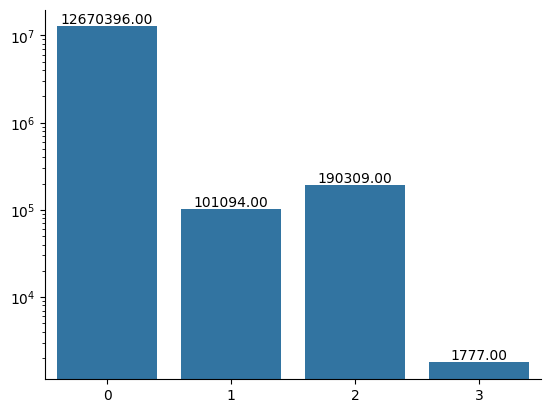

In [102]:
ax = sns.barplot(sup_threshold_1000_counter)
sns.despine()
plt.bar_label(ax.containers[0], fmt="%.2f")
plt.yscale("log")

In [104]:
190309 + 101094 + 1777

293180

In [105]:
293180 * 2

586360

In [8]:
def read_chimeric_read(path):
    result = set()
    with open(path) as f:
        for line in f:
            result.add(line.strip())
    return result

def read_chmeric_sup(path):
    result = {}
    with open(path) as f:
        for line in f:
            content = line.strip().split()
            if len(content) == 2:
                read_name, sup = content 
                result[read_name] = [int(sup)]
            else:
                read_name, sup, samples = content 
                result[read_name] = [int(sup), samples] 
                
    return result

def read_prediction(path):
    result = {}
    with open(path) as f:
        for line in f:
            content = line.strip().split()
            result[content[0]] = int(content[1])
    return result

In [22]:
## bulk clean chimeric support

mk1c_bulk_chimeric_events  =  read_chmeric_sup(project_path/ "data/raw/PC3_bulk_WGS_Mk1c_clean.threshold_1000.sup.txt")
p2_bulk_chimeric_events = read_chmeric_sup(project_path/"data/raw/PC3_bulk_WGS_P2_clean.threshold_1000.sup.txt")
pacbio_bulk_chimeric_events = read_chmeric_sup(project_path/ "data/raw/PC3_bulk_WGS_Pacbio_clean.threshold_1000.sup.txt")

In [24]:
mk1c_bulk_chimeric_events_sup = {key:value[0] for key,value in mk1c_bulk_chimeric_events.items()}
p2_bulk_chimeric_events_sup  = {key:value[0] for key,value in p2_bulk_chimeric_events.items()}
pacbio_bulk_chimeric_events_sup = {key:value[0] for key,value in pacbio_bulk_chimeric_events.items()}

In [28]:
def write_sup(sup_data, output_file, threshold:int =1):
    with open(output_file, 'w') as f:
        for read_id, sup in sup_data.items():
            if sup >=threshold:
                f.write(f"{read_id}\n")

In [30]:
write_sup(mk1c_bulk_chimeric_events_sup, project_path/"data/raw"/"PC3_bulk_WGS_Mk1c_clean.selected_min_sup_1.txt")

In [31]:
write_sup(p2_bulk_chimeric_events_sup, project_path/"data/raw"/"PC3_bulk_WGS_P2_clean.selected_min_sup_1.txt")

In [32]:
write_sup(pacbio_bulk_chimeric_events_sup, project_path/"data/raw"/"PC3_bulk_WGS_Pacbio_clean.selected_min_sup_1.txt")

In [25]:
Counter(mk1c_bulk_chimeric_events_sup.values())

Counter({0: 26002, 1: 1702, 2: 1044})

In [26]:
Counter(p2_bulk_chimeric_events_sup.values())

Counter({0: 208330, 1: 16825, 2: 8585})

In [27]:
Counter(pacbio_bulk_chimeric_events_sup.values())

Counter({0: 93543, 2: 11031, 1: 9856})

In [34]:
 1702 + 1044 + 16825 + 8585 + 11031 + 9856 + 586360

635403

In [5]:
mk1c_chimeric_reads = read_chimeric_read(project_path / "data/raw/PC3_10_cells_MDA_Mk1c_dirty.bam.chimeric_reads.txt")

In [12]:
mk1c_chimeric_events = read_chmeric_sup(project_path / "data/raw/PC3_10_cells_MDA_Mk1c_dirty.threshold_1000.sup.txt")

In [16]:
p2_chimeric_events = read_chmeric_sup(project_path / "data/raw/PC3_10_cells_MDA_P2_dirty.threshold_1000.sup.txt")

In [17]:
len(p2_chimeric_events)

12963576

In [14]:
len(mk1c_chimeric_reads)

1666427

In [25]:
len(set(mk1c_chimeric_reads))

1666427

In [58]:
mk1c_chimeric_events

{'2077aad5-2077-42ec-ac64-8b7ff1019457': [0],
 '9bbe1337-a14f-4119-a5e8-51913573d23b': [0],
 'afed05ad-f3ee-4828-848d-96b4b31ef143': [0],
 '303b3760-d788-4d6b-b1d1-c63339cb8230': [0],
 'bc973a4d-47a7-4eb2-bdef-fe302acaa9e1': [0],
 '85985879-fecd-4938-a4b9-cf0befe3a767': [0],
 '1928a08e-8ab3-4849-aa1b-b966f3a3d656': [0],
 'cab96800-9e89-4650-b9cc-121d88bc60bf_1': [0],
 '71d3c43b-d969-4577-9173-00dc02d5943c': [0],
 '65f3b3b0-c490-4cb2-b3be-241d8c6c6b81': [0],
 '0f29c6ae-0633-46c8-a187-889371363a91': [0],
 'e6d08ff0-65da-4165-9291-866bb24116c9': [0],
 'f5e17b24-005e-4921-ac24-c63f4fc92e9a': [0],
 '391c4376-8c99-4028-86b2-0b719d2f0d1d': [0],
 '682b099b-a275-47eb-b54f-8269b5a33f8d': [0],
 '402bc9e9-82e9-437c-bc5f-82d648ed2dd4': [0],
 '9db22f9c-dcaa-495f-ab9b-baf15ddf9272': [1, 'PC3_bulk_WGS_P2_clean.bam'],
 '60af077c-d8b3-4da1-8169-06bfca514628': [0],
 'fb371361-8629-4176-bb3c-a3e375f275d4': [0],
 'ddae8075-fa11-4a11-8f2e-d348a457837a': [0],
 'ec4ecb9e-b85b-4040-a4fc-6dde9ee4cac4': [0],
 '9

In [9]:
import matplotlib.pyplot as plt
from collections import Counter


def plot_support_frequency(ax, support_list, title="Support Frequency Summary"):
    """
    Plots bar chart of support value frequencies and shows their ratios and absolute counts on a given axis.
    
    Args:
        ax (matplotlib.axes.Axes): Axis to plot on
        support_list (list[int]): List of support values (integers)
        title (str): Plot title
    """
    counter = Counter(support_list)
    support_values = sorted(counter)
    frequencies = [counter[sup] for sup in support_values]
    total = len(support_list)
    ratios = [freq / total for freq in frequencies] if total > 0 else [0 for _ in frequencies]
    
    ax.bar(support_values, frequencies, alpha=0.7)
    ax.set_xlabel("Support Value")
    ax.set_ylabel("Frequency Count")
    ax.set_title(f"{title} (n={total})")
    
    for x, freq, ratio in zip(support_values, frequencies, ratios):
        ax.text(
            x, freq + 0.5, 
            f"{freq} ({ratio:.1%})", 
            ha="center", fontsize=9
        )

def categorize_support(support_list):
    """
    Categorizes support values into binary categories:
    - 'sup >=1'
    - 'sup = 0'
    
    Args:
        support_list (list[int])
        
    Returns:
        dict: {'sup >=1': count, 'sup = 0': count}
    """
    sup_ge_1 = sum(1 for x in support_list if x >= 1)
    sup_eq_0 = len(support_list) - sup_ge_1
    return {'sup >=1': sup_ge_1, 'sup = 0': sup_eq_0}

def plot_stacked_bar(ax, before_counts, after_counts, title):
    """
    Plots two stacked bars side by side on given axis, with combined ratio text labels above each bar.
    """
    labels = ['Before', 'After']
    sup_ge_1_counts = [before_counts['sup >=1'], after_counts['sup >=1']]
    sup_eq_0_counts = [before_counts['sup = 0'], after_counts['sup = 0']]

    x = range(len(labels))

    # Calculate total for ratios
    totals = [sup_eq_0 + sup_ge_1 for sup_eq_0, sup_ge_1 in zip(sup_eq_0_counts, sup_ge_1_counts)]

    # First bar: sup = 0
    bars0 = ax.bar(x, sup_eq_0_counts, label='sup = 0')
    # Second bar: sup >=1, stacked on top of sup=0
    bars1 = ax.bar(x, sup_ge_1_counts, bottom=sup_eq_0_counts, label='sup ≥ 1')

    # Annotate with combined ratios above bars
    for i in x:
        if totals[i] == 0:
            ratio0 = ratio1 = 0
        else:
            ratio0 = sup_eq_0_counts[i] / totals[i]
            ratio1 = sup_ge_1_counts[i] / totals[i]
        ax.text(
            i, totals[i] + max(totals)*0.02,  # place slightly above the bar
            f"{ratio0:.2f} / {ratio1:.2f}",
            ha='center', va='bottom', fontsize=9
        )

    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel("Count")
    ax.set_title(title)
    ax.legend()


def summary_prediction_with_chimeric_sup(mk1c_predictions, mk1c_chimeric_events):
    mk1c_predictions_positive_set = {read for read, prediction in mk1c_predictions.items() if prediction == 1}
    mk1c_predictions_negative_set = {read for read, prediction in mk1c_predictions.items() if prediction == 0}

    mk1c_predictions_positive_sup = [
        mk1c_chimeric_events[read][0] 
        for read in mk1c_predictions_positive_set
        if read in mk1c_chimeric_events
    ]
    
    mk1c_predictions_negative_sup = [
        mk1c_chimeric_events[read][0] 
        for read in mk1c_predictions_negative_set
        if read in mk1c_chimeric_events
    ]

    mk1c_predictions_sup = [v[0] for v in mk1c_chimeric_events.values()]

    mk1c_chimeric_events_without_positive_sup = [
        v[0] for k,v in mk1c_chimeric_events.items() if k not in mk1c_predictions_positive_set
    ]

    # Categorize for stacked bar plot
    before_counts = categorize_support(mk1c_predictions_sup)
    after_counts = categorize_support(mk1c_chimeric_events_without_positive_sup)

    # Create 3x2 panel for all six plots
    fig, axes = plt.subplots(3, 2, figsize=(12, 15))

    # Frequency plots
    plot_support_frequency(axes[0,0], mk1c_predictions_positive_sup, title="Positive: Support Frequency")
    plot_support_frequency(axes[0,1], mk1c_predictions_negative_sup, title="Negative: Support Frequency")
    plot_support_frequency(axes[1,0], mk1c_predictions_sup, title="Before Removing Positive")
    plot_support_frequency(axes[1,1], mk1c_chimeric_events_without_positive_sup, title="After Removing Positive")

    # Stacked bar plots
    plot_stacked_bar(axes[2,0], before_counts, after_counts, title="Support Categories Before vs After")

    # Hide the unused last subplot (bottom right)
    axes[2,1].axis('off')

    plt.tight_layout()
    plt.show()

    return {
        "positive_support": mk1c_predictions_positive_sup,
        "negative_support": mk1c_predictions_negative_sup,
        "before_counts": before_counts,
        "after_counts": after_counts
    }

In [10]:
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

def plot_support_frequency_by_svtype(read_support_map, sv_type_map, title="Support Frequency by SV Type"):
    """
    Plots grouped bar chart of support value frequencies categorized by SV type.

    Args:
        read_support_map (dict[str, int]): Mapping from read ID to support count.
        sv_type_map (dict[str, list[str]]): Mapping from read ID to SV types.
        title (str): Title of the plot.
    """
    # Group support values by SV type
    support_by_svtype = defaultdict(list)
    for read_id, support in read_support_map.items():
        sv_types = sv_type_map.get(read_id, ['Unknown'])
        for sv in sv_types:
            support_by_svtype[sv].append(support[0])

    # Count support frequencies per SV type
    all_support_values = set()
    freq_by_svtype = {}
    for sv, support_list in support_by_svtype.items():
        counter = Counter(support_list)
        freq_by_svtype[sv] = counter
        all_support_values.update(counter.keys())

    all_support_values = sorted(all_support_values)
    sv_types = sorted(freq_by_svtype)

    # Prepare plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.8 / len(sv_types)
    x = list(range(len(all_support_values)))

    for i, sv in enumerate(sv_types):
        offsets = [val + i * bar_width for val in x]
        heights = [freq_by_svtype[sv].get(sup_val, 0) for sup_val in all_support_values]
        ax.bar(offsets, heights, bar_width, label=sv)

    ax.set_xticks([val + bar_width * (len(sv_types)-1) / 2 for val in x])
    ax.set_xticklabels(all_support_values)
    ax.set_xlabel("Support Value")
    ax.set_ylabel("Frequency Count")
    ax.set_title(title)
    ax.legend(title="SV Type")
    plt.tight_layout()
    plt.show()


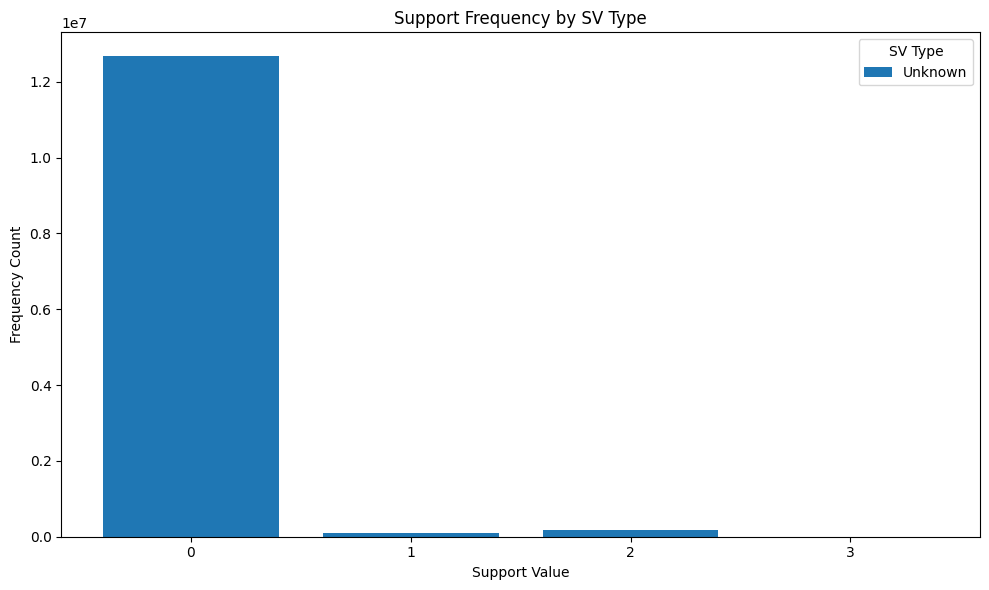

In [64]:
plot_support_frequency_by_svtype(p2_chimeric_events,mk1c_sv)

In [19]:
def read_prediction_for_p2(path_prefix):
    result = {}
    for i in range(1, 14):
        folder = f"{path_prefix}_{i}/predicts.txt"

        result.update(read_prediction(folder))
    return result    

In [12]:
# /gpfs/projects/b1171/qgn1237/4_single_cell_SV_chimera/20241106_trimmed_updated_BAM_annotation_for_LLM/PC3_10_cells_MDA_Mk1c_dirty/cutesv_PC3_10_cells_MDA_Mk1c_dirty.vcf
# /gpfs/projects/b1171/qgn1237/4_single_cell_SV_chimera/20241106_trimmed_updated_BAM_annotation_for_LLM/PC3_10_cells_MDA_P2_dirty/chimeric_reads_mapping/cutesv_PC3_10_cells_MDA_P2_dirty.vcf

def read_sv(path):
    result = {}
    with open(path) as f:
        for line in f:
            if line.startswith("#"):
                continue

            content = line.split()
            info_line = content[7]
            infos = {}
            
            for value in info_line.split(';'):
                if "=" in value:
                    infos[value.split("=")[0]] = value.split("=")[1].split(',')
            
            for read in infos['RNAMES']:
                result[read] = infos['SVTYPE']

    return result 
                    
    

In [53]:
mk1c_sv = read_sv("/gpfs/projects/b1171/qgn1237/4_single_cell_SV_chimera/20241106_trimmed_updated_BAM_annotation_for_LLM/PC3_10_cells_MDA_Mk1c_dirty/cutesv_PC3_10_cells_MDA_Mk1c_dirty.vcf")

In [54]:
mk1c_sv

{'9752484a-a807-4944-a787-e9e4f5455e35': ['INS'],
 'a9e00f4d-1687-439d-8b5f-3b9566062b01': ['INV'],
 '811b0fa7-fe04-4b55-825f-b3459907bab8': ['BND'],
 '1a4831d9-9f36-4d2c-b17c-c5fd68ed87e8': ['BND'],
 '084cadfc-cd9d-498f-99f8-3c3d0d42e476': ['BND'],
 '9ad2aecf-3966-4da7-b924-9955b7991a25_1': ['INV'],
 '07cef5e3-9f65-4d95-8595-84b170d5b1a4': ['INV'],
 '1d0e4aec-9b03-46d8-a17e-e329b1d4b7d9': ['INV'],
 '6b5c94d9-08ba-4370-83bb-2134c06ddf89': ['INV'],
 '5e51698c-2dcf-4125-925e-423e82aa9864': ['BND'],
 '780a33a6-1a13-4724-880c-4632a6714e62': ['BND'],
 '04b2aedb-96b8-40c0-8eeb-8974ea3fcd1a': ['BND'],
 '12eb777c-401d-467a-98c6-3f1c441c8de6': ['BND'],
 '18bf057a-757b-4685-bf24-073c8be28fc1': ['BND'],
 '50ea1898-f662-4dfd-b6d2-338ad05544eb': ['DEL'],
 '72d13836-2311-4a2c-a338-f151cee8e723': ['DEL'],
 '2203641f-be80-4799-b7a7-17cb8df56d4a_1': ['BND'],
 '2203641f-be80-4799-b7a7-17cb8df56d4a': ['BND'],
 '4917a3cd-4910-4d43-a148-f85626e758de': ['BND'],
 '7a456f0d-b186-4427-a2e7-fb1e945f14da': ['INS

In [55]:
len(mk1c_sv)

36982

In [20]:
hyena_586360_p2_predictions = read_prediction_for_p2("/gpfs/projects/b1171/ylk4626/project/Chimera/logs/eval/runs/chhyena_p2_586360_p2")

In [23]:
Counter(hyena_586360_p2_predictions.values())

Counter({1: 12600664, 0: 362912})

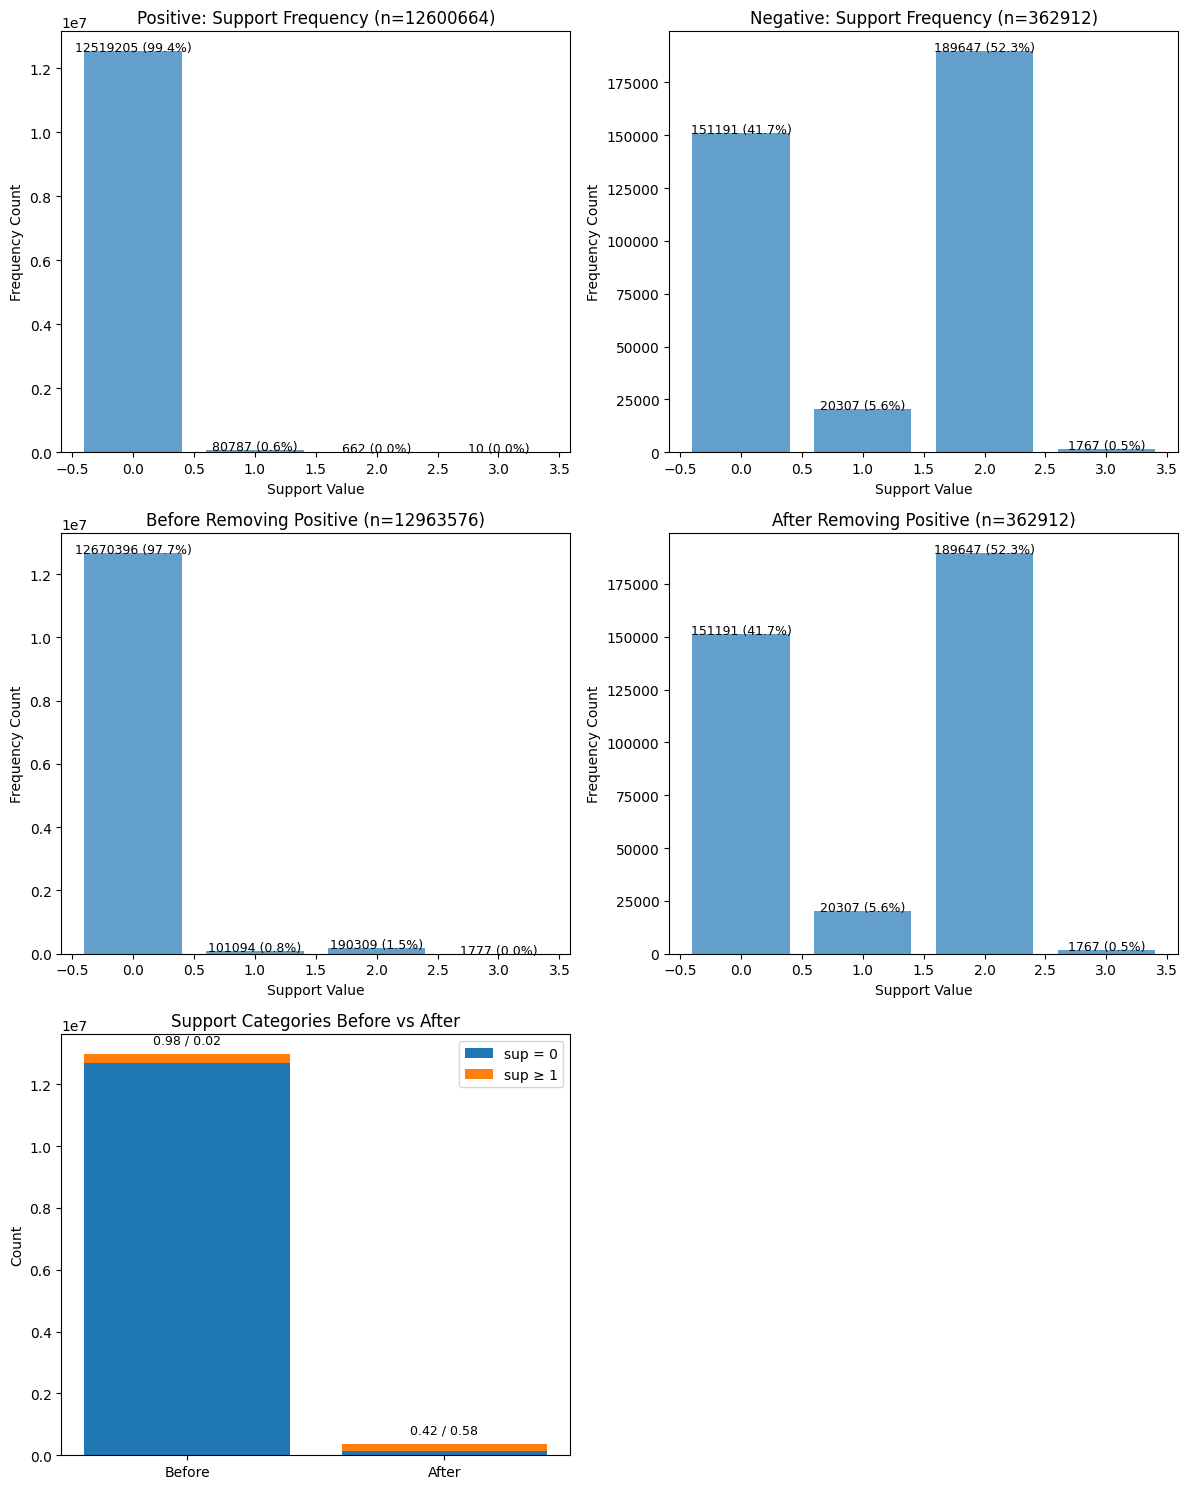

In [21]:
tt = summary_prediction_with_chimeric_sup(hyena_586360_p2_predictions,  p2_chimeric_events)

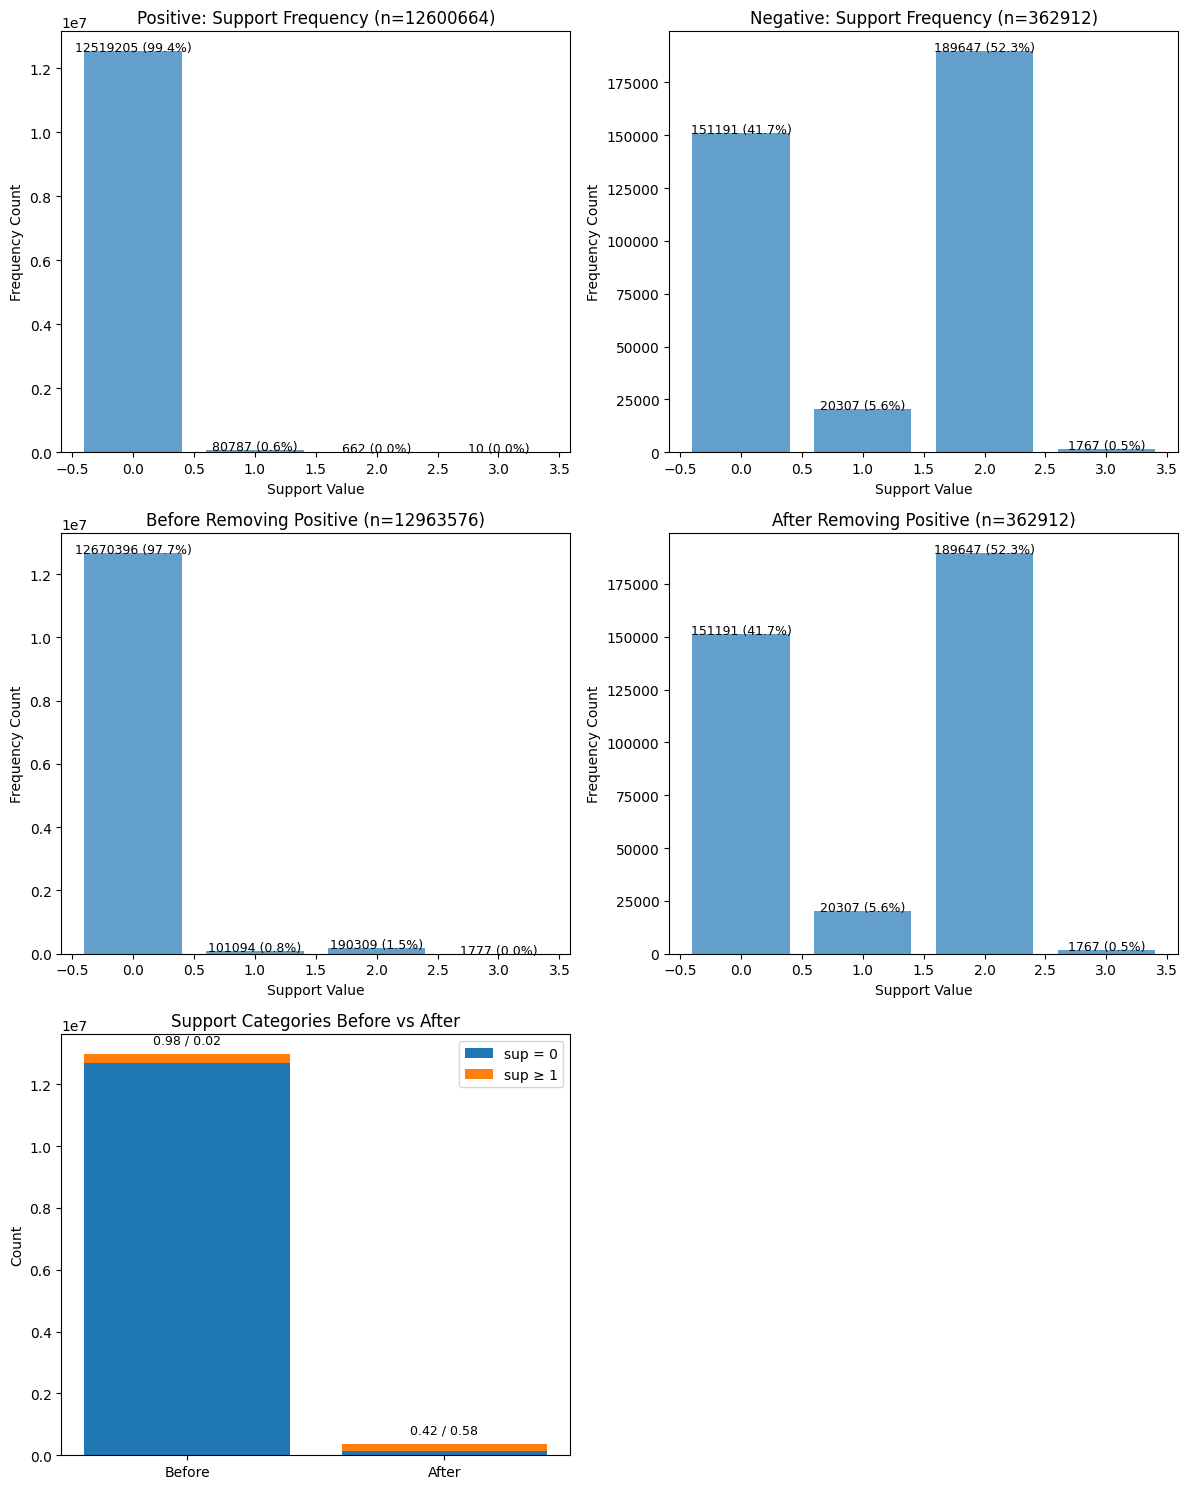

In [48]:
tt = summary_prediction_with_chimeric_sup(chcnn_p2_predictions,  p2_chimeric_events)

In [ ]:
chmamba_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chmambasp_mk1c/predicts.txt")

In [49]:
chhyena_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chhyena_mk1c/predicts.txt")

In [52]:
chcnn_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chcnn_mk1c/predicts.txt")

In [79]:
chcnn_p5_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chcnn_p5_mk1c/predicts.txt")

In [106]:
chcnn_p2_586360_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chcnn_p2_586360_mk1c/predicts.txt")

In [13]:
chhyena_p2_586360_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chhyena_p2_586360_mk1c/predicts.txt")

In [36]:
chtransformer_p2_586360_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/chtransformer_p2_586360_mk1c/predicts.txt")

In [6]:
cnn_p2_765108_bulk_mk1c_prediction = read_prediction(project_path / "logs/eval/runs/cnn_p2_765108_bulk_mk1c/predicts.txt")

NameError: name 'read_prediction' is not defined

In [8]:

hyena_p2_765108_bulk_mk1c_predictions = read_prediction(project_path / "logs/eval/runs/hyena_p2_765108_bulk_mk1c/predicts.txt")

In [10]:
len(hyena_p2_765108_bulk_mk1c_predictions)

1666427

In [11]:
Counter(hyena_p2_765108_bulk_mk1c_predictions.values())

Counter({1: 1583693, 0: 82734})

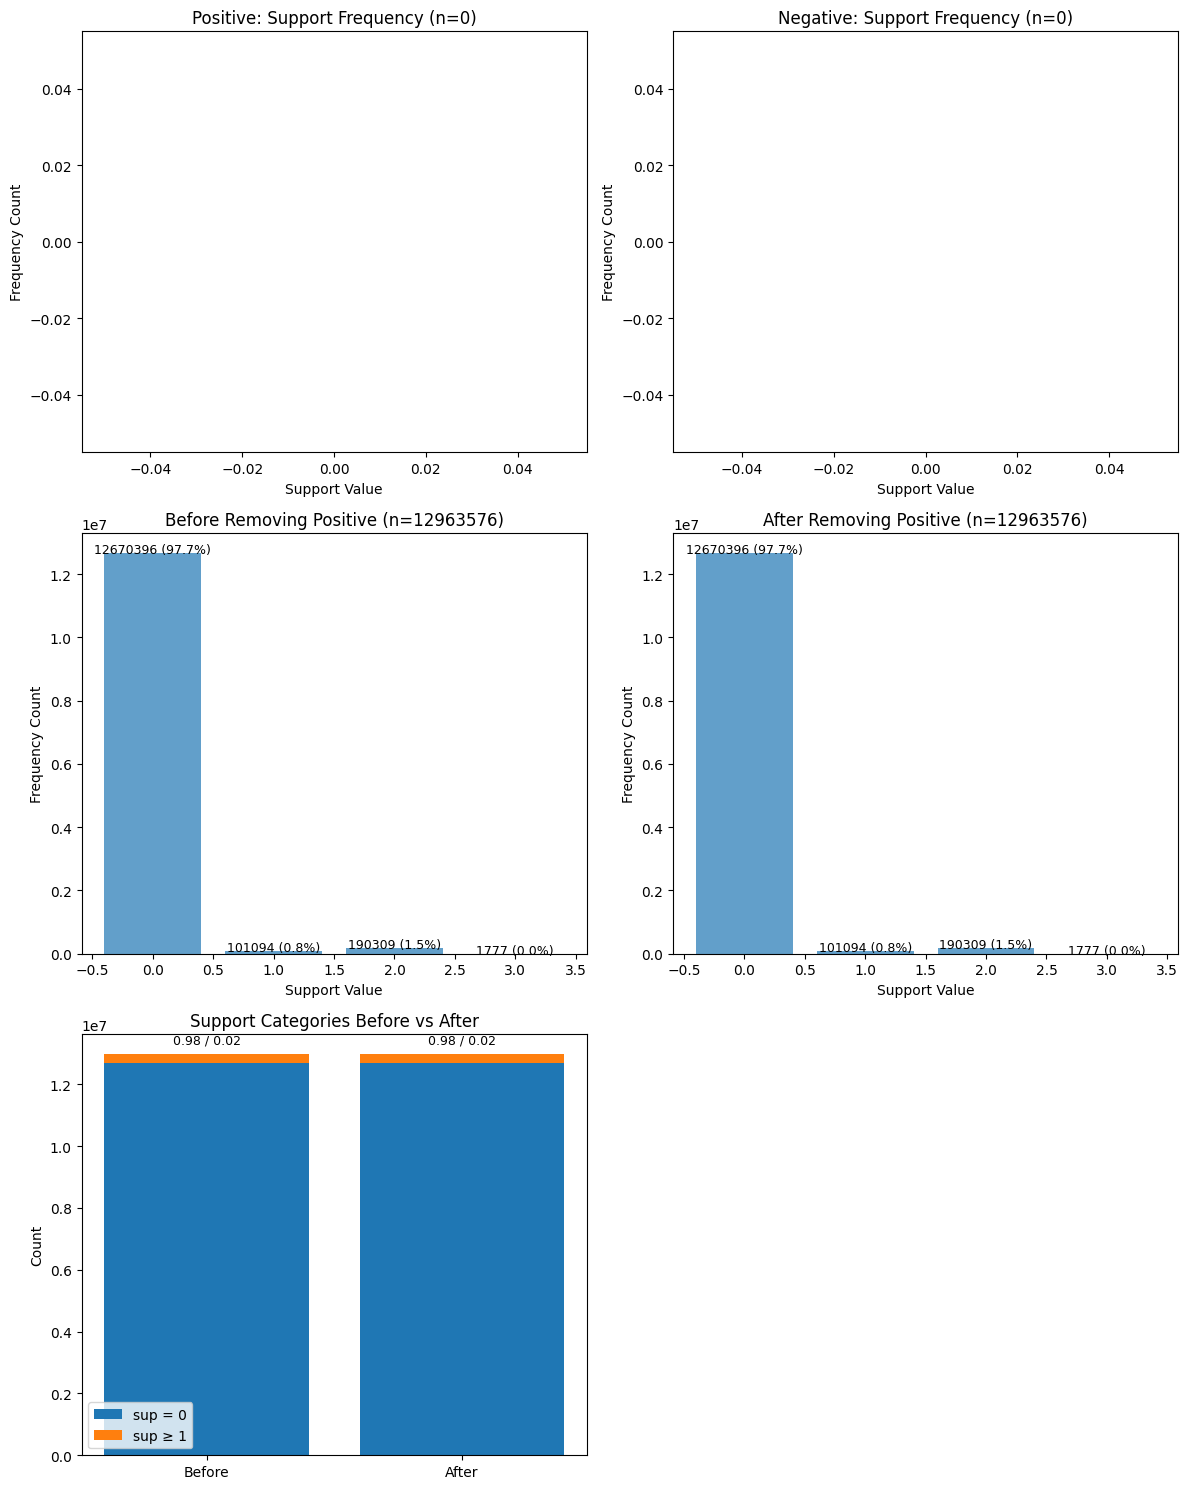

In [18]:
tt= summary_prediction_with_chimeric_sup(chhyena_p2_586360_mk1c_predictions,  p2_chimeric_events)

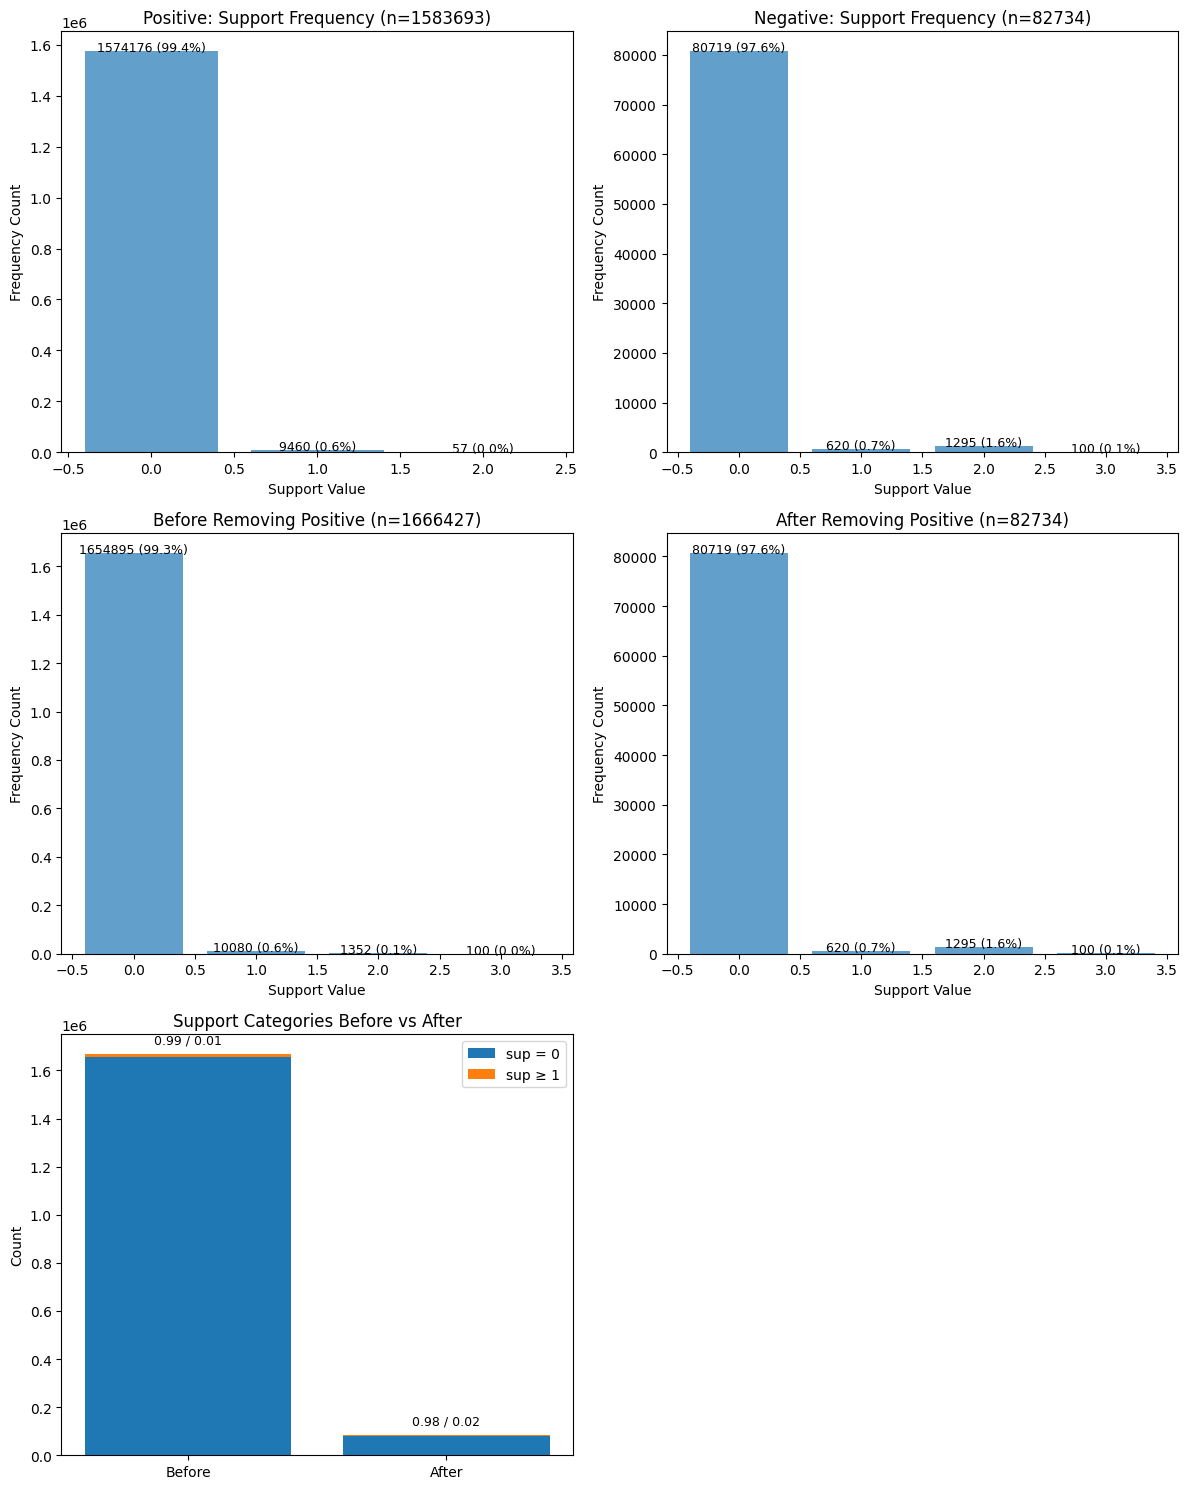

In [11]:
tt= summary_prediction_with_chimeric_sup(hyena_p2_765108_bulk_mk1c_predictions,  mk1c_chimeric_events)

In [16]:
487602 / (7193945 - 1178825)

0.08106272194070942

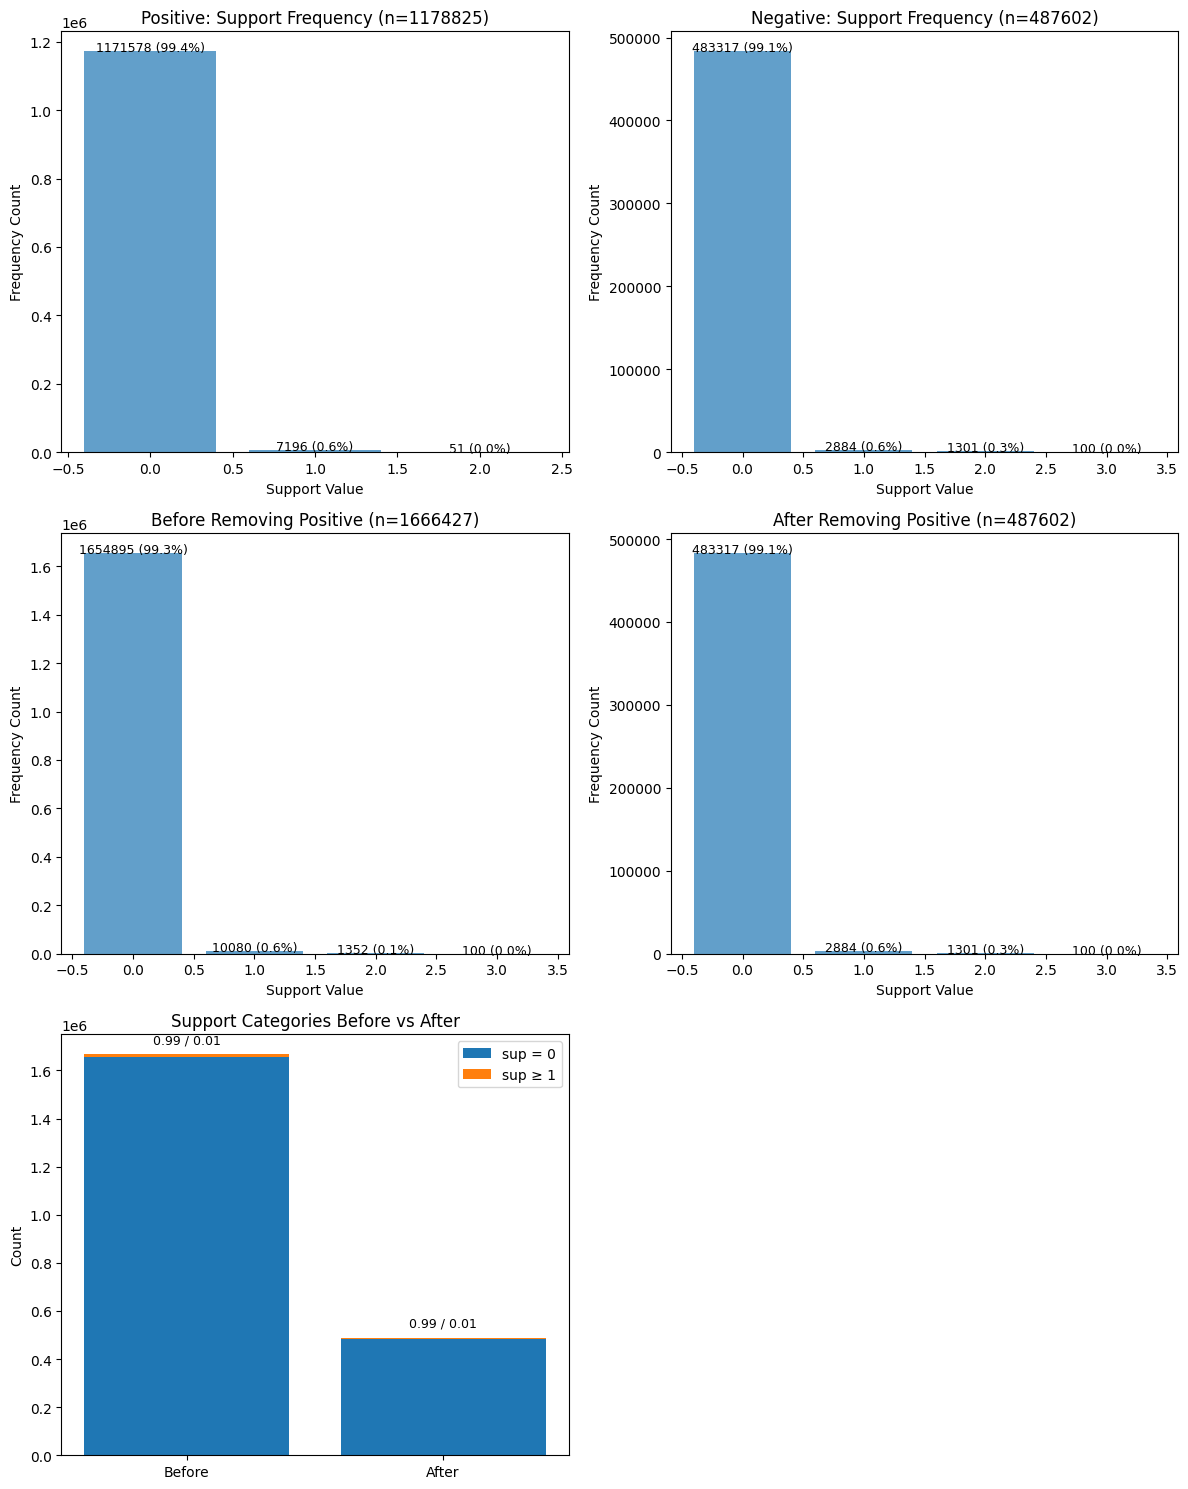

In [12]:
tt = summary_prediction_with_chimeric_sup(cnn_p2_765108_bulk_mk1c_prediction,  mk1c_chimeric_events)

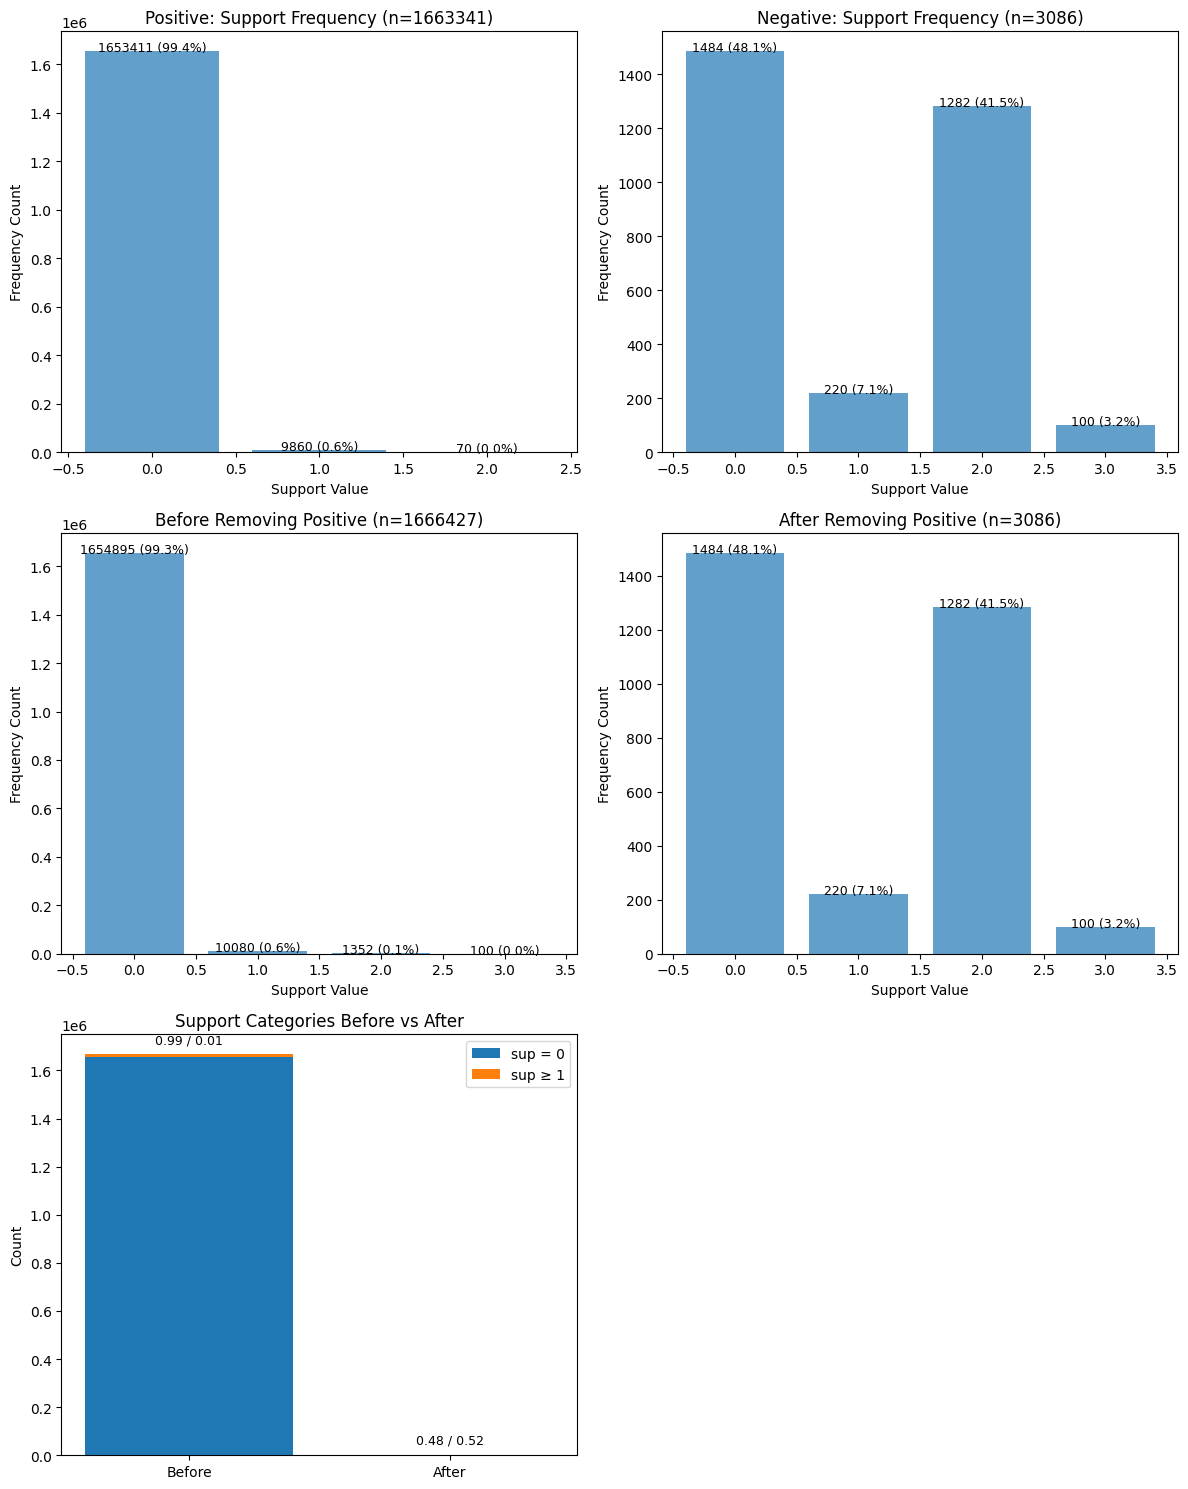

In [75]:
tt = summary_prediction_with_chimeric_sup(chmamba_mk1c_predictions,  mk1c_chimeric_events)

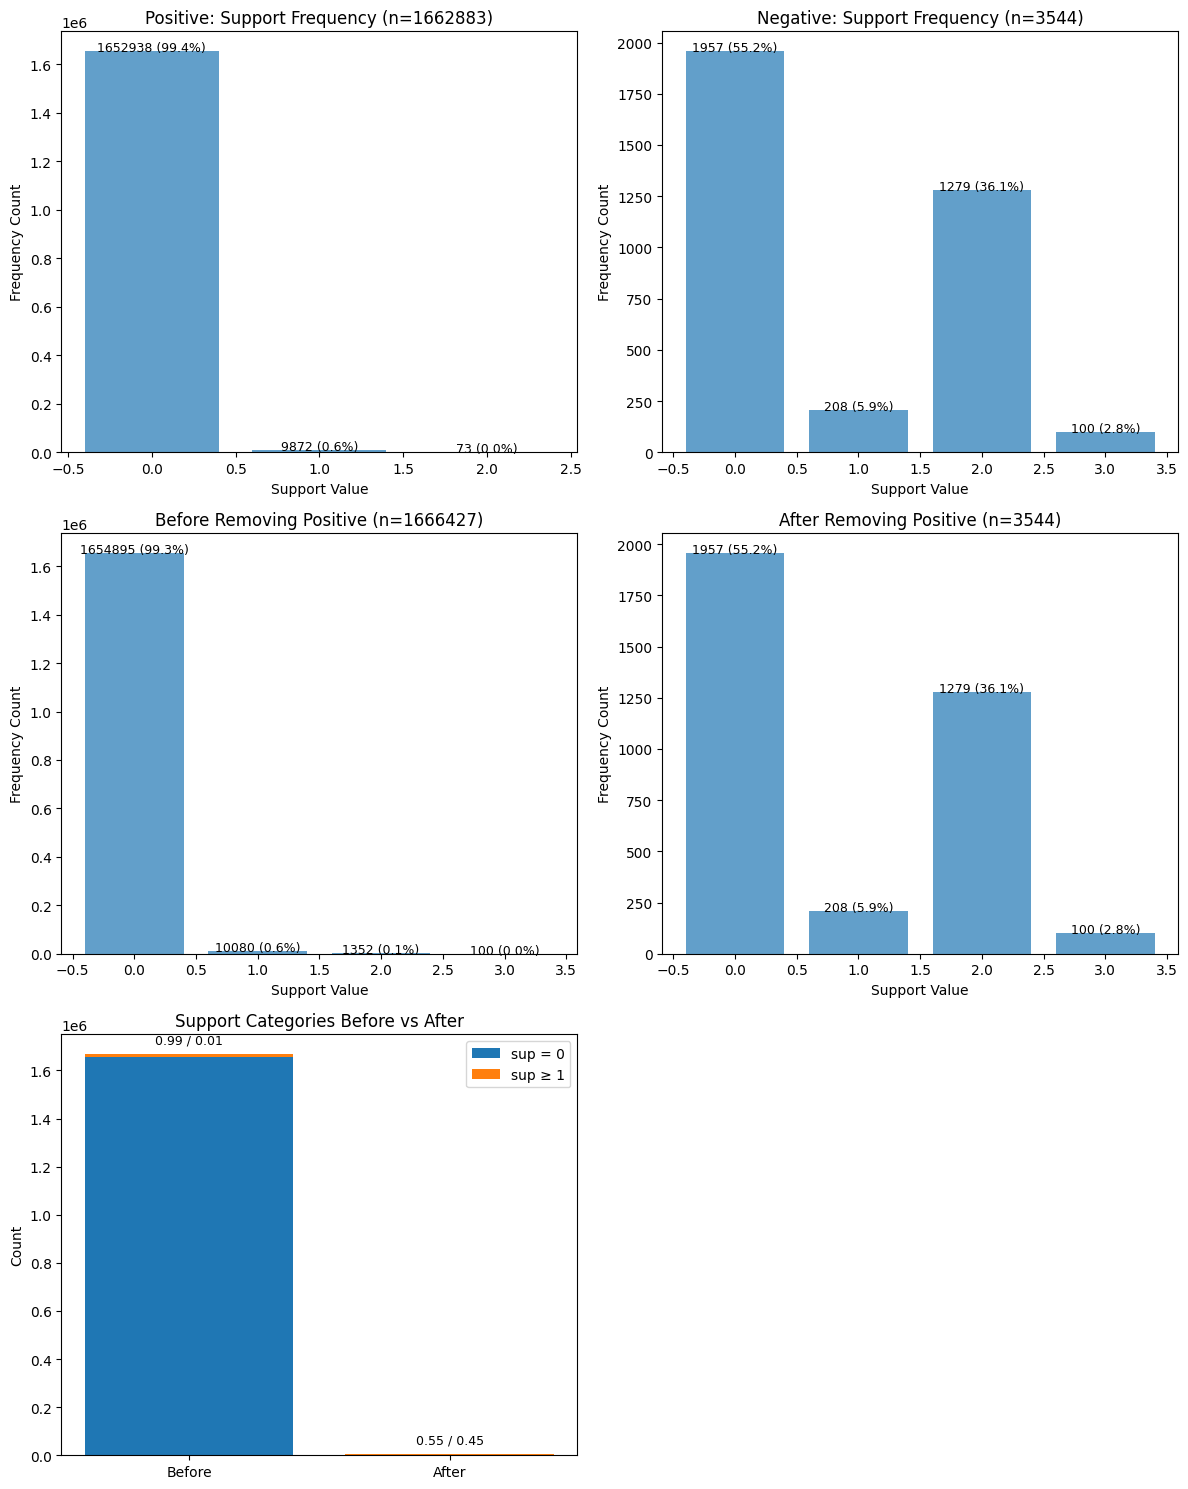

In [76]:
_ = summary_prediction_with_chimeric_sup(chhyena_mk1c_predictions,  mk1c_chimeric_events)

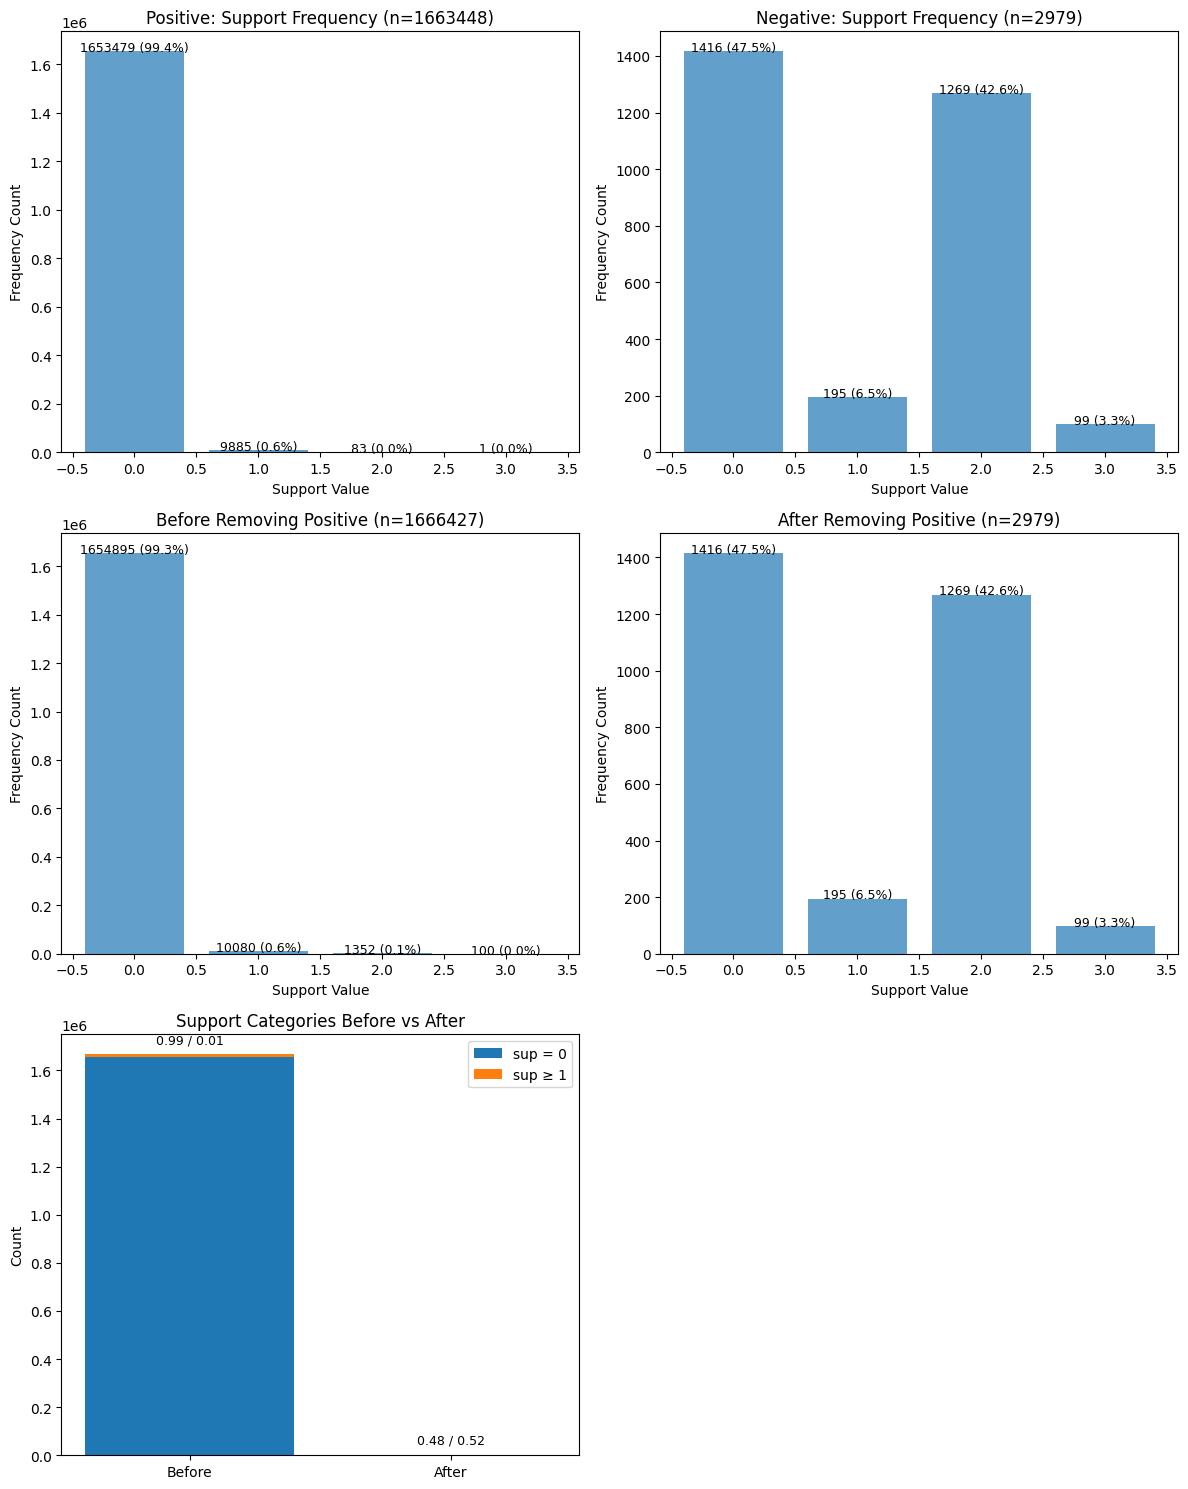

In [77]:
_ = summary_prediction_with_chimeric_sup(chcnn_mk1c_predictions,  mk1c_chimeric_events)

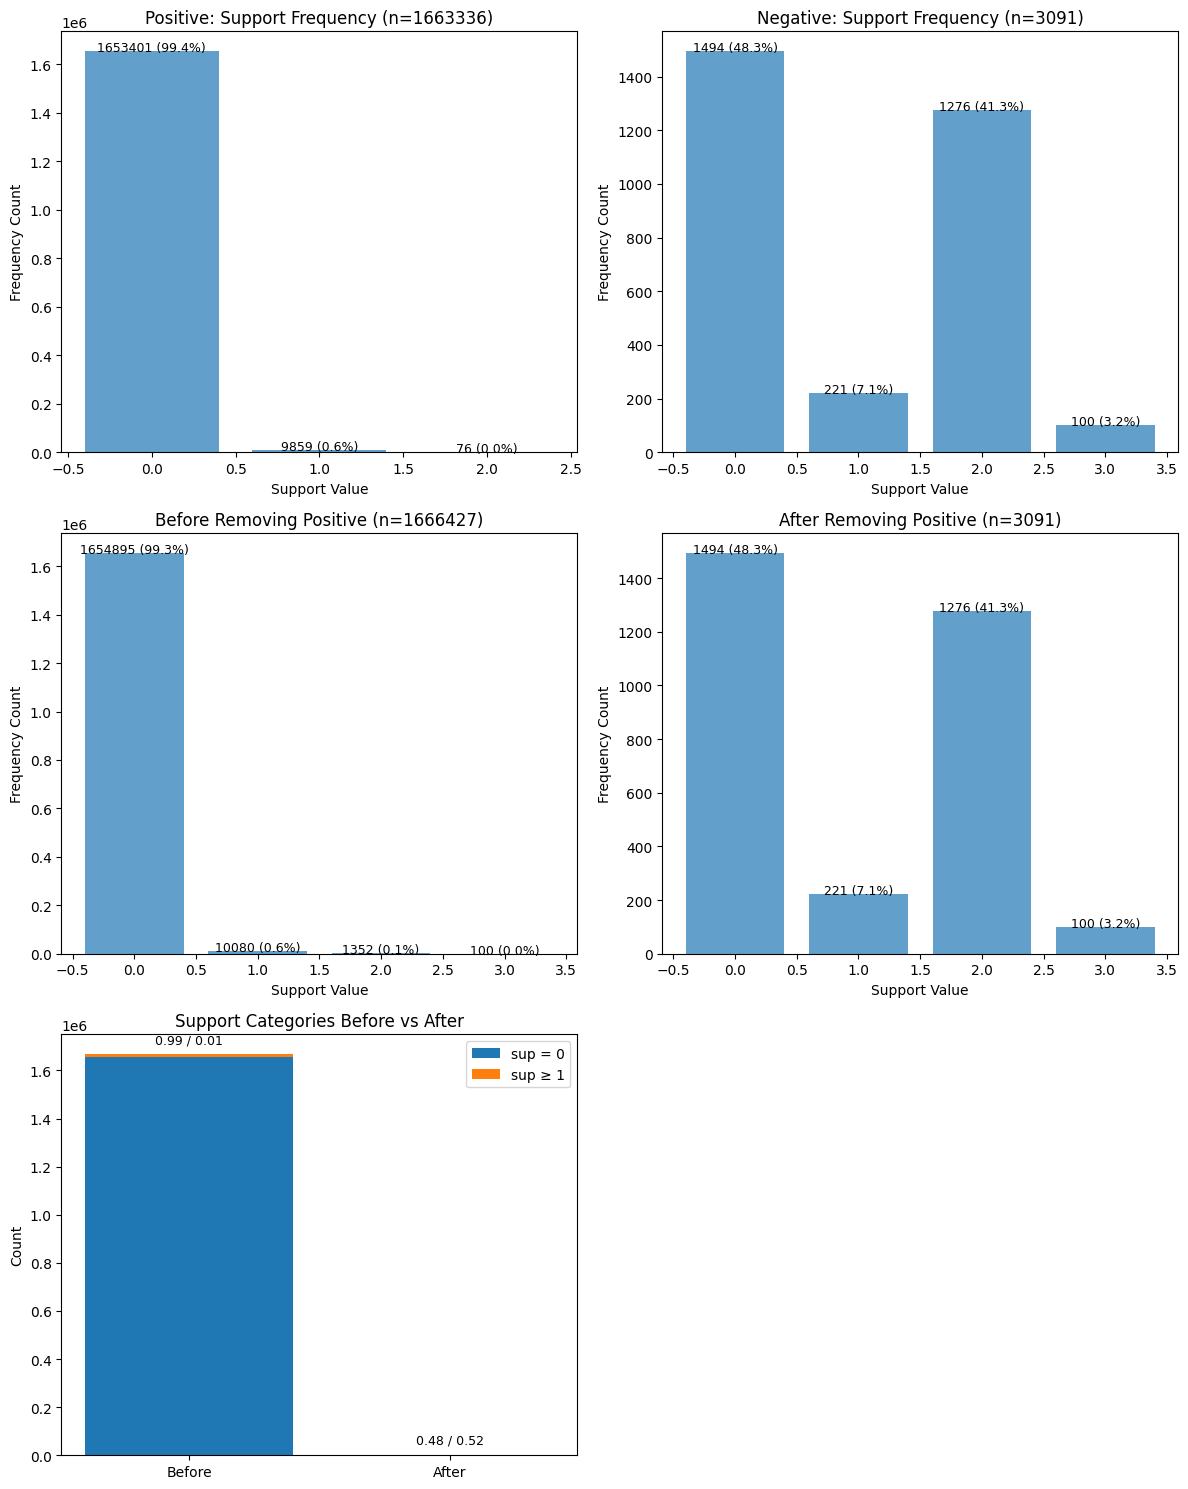

In [80]:
_ = summary_prediction_with_chimeric_sup(chcnn_p5_mk1c_predictions,  mk1c_chimeric_events)

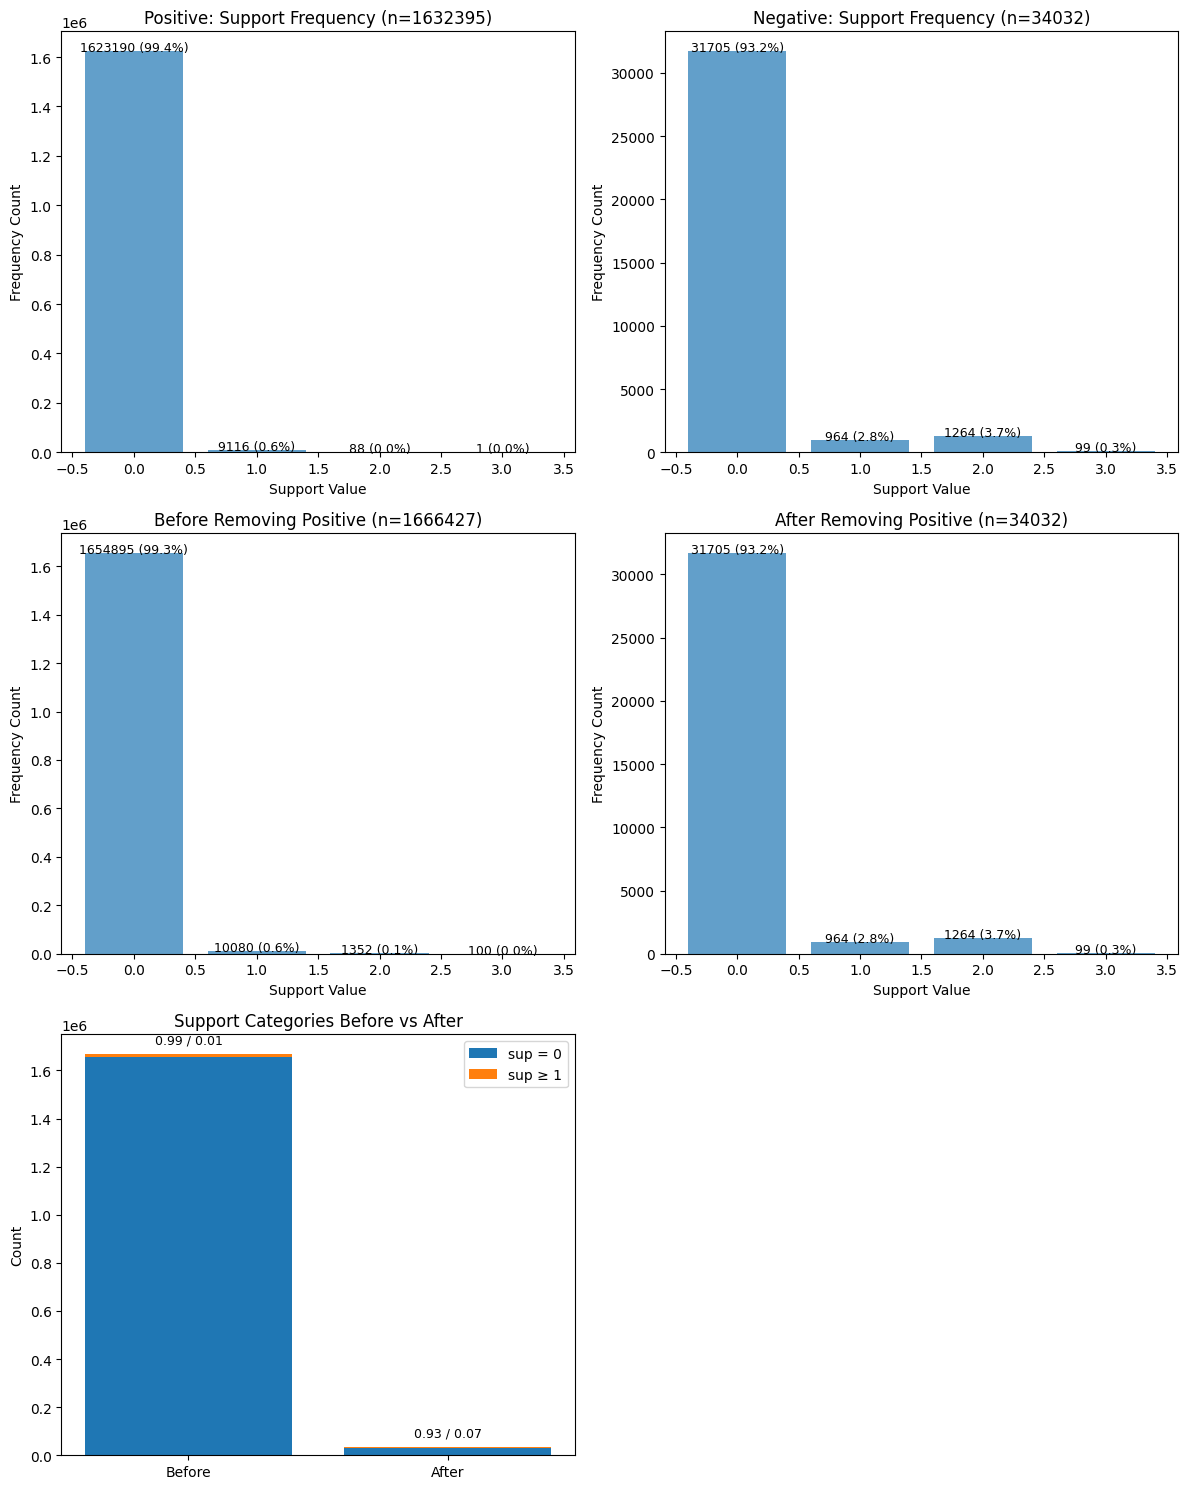

In [107]:
_ = summary_prediction_with_chimeric_sup(chcnn_p2_586360_mk1c_predictions,  mk1c_chimeric_events)

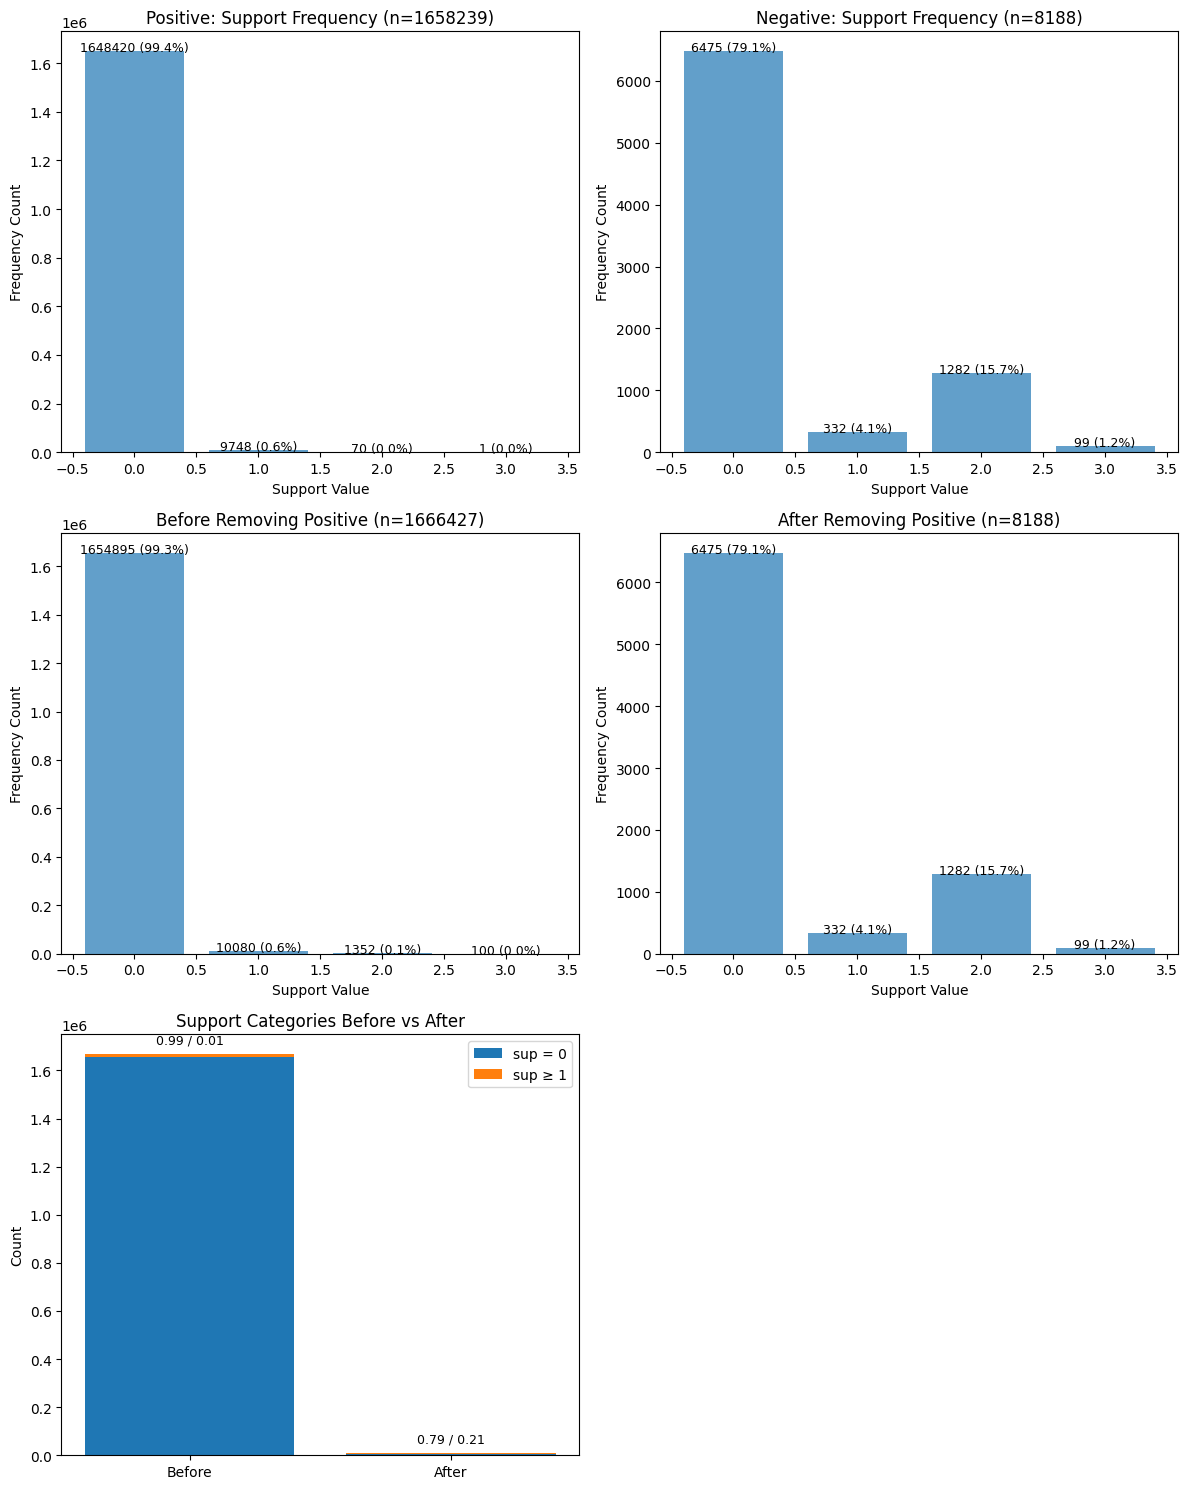

In [14]:
_ = summary_prediction_with_chimeric_sup(chhyena_p2_586360_mk1c_predictions,  mk1c_chimeric_events)

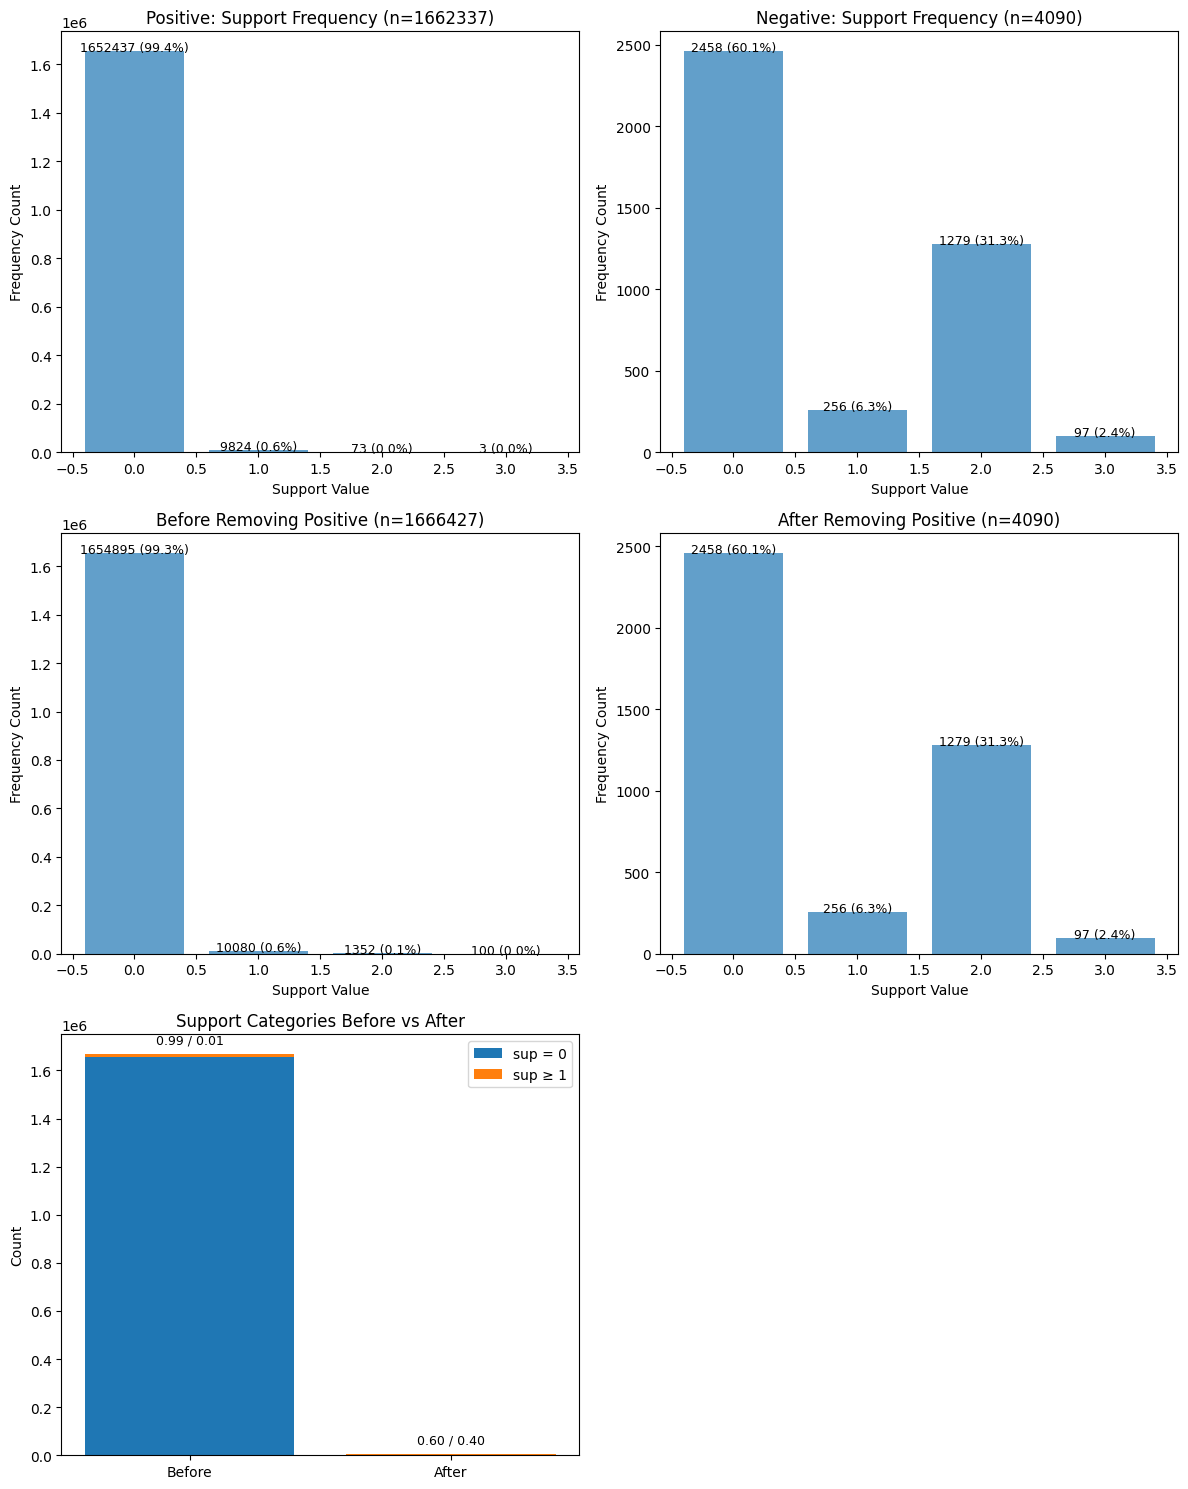

In [37]:
_ = summary_prediction_with_chimeric_sup(chtransformer_p2_586360_mk1c_predictions,  mk1c_chimeric_events)

In [5]:
# Chimera Artifact's read length